In [ ]:
# Importing Dataset
reviews = pd.read_excel(r'C:\Users\tasmi\OneDrive\ExcelR\Hotel Rating Classification Project ExcelR\hotel_reviews.xlsx')
reviews.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
reviews.shape

(20491, 2)

In [ ]:
reviews.Rating.describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [ ]:
reviews.columns

Index(['Review', 'Rating'], dtype='object')

In [ ]:
reviews['Rating'].unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [ ]:
count =reviews.isnull().sum().sort_values(ascending=False)
count

Review    0
Rating    0
dtype: int64

In [ ]:
reviews_f=reviews.copy()

In [ ]:
#Number of Words
reviews_f['word_count'] = reviews_f['Review'].apply(lambda x: len(str(x).split(" ")))
reviews_f[['Review','word_count']].head()

,Review,word_count
0,nice hotel expensive parking got good deal sta...,89
1,ok nothing special charge diamond member hilto...,252
2,nice rooms not 4* experience hotel monaco seat...,219
3,"unique, great stay, wonderful time hotel monac...",91
4,"great stay great stay, went seahawk game aweso...",193


In [ ]:
#Number of characters including space
reviews_f['char_count'] = reviews_f['Review'].str.len()
reviews_f[['Review','char_count']].head()

,Review,char_count
0,nice hotel expensive parking got good deal sta...,593
1,ok nothing special charge diamond member hilto...,1689
2,nice rooms not 4* experience hotel monaco seat...,1427
3,"unique, great stay, wonderful time hotel monac...",600
4,"great stay great stay, went seahawk game aweso...",1281


In [ ]:
#Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews_f['avg_word'] = reviews_f['Review'].apply(lambda x: avg_word(x))
reviews_f[['Review','avg_word']].head()


,Review,avg_word
0,nice hotel expensive parking got good deal sta...,5.804598
1,ok nothing special charge diamond member hilto...,5.752000
2,nice rooms not 4* experience hotel monaco seat...,5.571429
3,"unique, great stay, wonderful time hotel monac...",5.730337
4,"great stay great stay, went seahawk game aweso...",5.701571


In [ ]:
#Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews_f['stopwords'] = reviews_f['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews_f[['Review','stopwords']].head()

,Review,stopwords
0,nice hotel expensive parking got good deal sta...,6
1,ok nothing special charge diamond member hilto...,12
2,nice rooms not 4* experience hotel monaco seat...,5
3,"unique, great stay, wonderful time hotel monac...",3
4,"great stay great stay, went seahawk game aweso...",11


In [ ]:
#Number of special characters
import re
special_characters = "!@#$%^&*()-_+={}[]:;\"'<>,./\?|~`"

# Function to count words starting with special characters
def count_special_words(review):
    words = re.findall(r'\b[' + re.escape(special_characters) + r']\w*\b', str(review))
    return len(words)

# Apply the function to the 'Review' column
reviews_f['hashtags'] = reviews_f['Review'].apply(count_special_words)

# Display the 'Review' and 'hashtags' columns
reviews_f[['Review', 'hashtags']].head()


,Review,hashtags
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,6
2,nice rooms not 4* experience hotel monaco seat...,13
3,"unique, great stay, wonderful time hotel monac...",3
4,"great stay great stay, went seahawk game aweso...",6


In [ ]:
#Number of numerics
reviews_f['numerics'] = reviews_f['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews_f[['Review','numerics']].head()

,Review,numerics
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,6
2,nice rooms not 4* experience hotel monaco seat...,7
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",2


In [ ]:
#Number of Uppercase words
reviews_f['upper'] = reviews_f['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews_f[['Review','upper']].head()

,Review,upper
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0


In [ ]:
reviews_f.columns

Index(['Review', 'Rating', 'word_count', 'char_count', 'avg_word', 'stopwords',
       'hashtags', 'numerics', 'upper'],
      dtype='object')

In [ ]:
reviews_f.head()

,Review,Rating,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,nice hotel expensive parking got good deal sta...,4,89,593,5.804598,6,1,1,0
1,ok nothing special charge diamond member hilto...,2,252,1689,5.752000,12,6,6,0
2,nice rooms not 4* experience hotel monaco seat...,3,219,1427,5.571429,5,13,7,0
3,"unique, great stay, wonderful time hotel monac...",5,91,600,5.730337,3,3,1,0
4,"great stay great stay, went seahawk game aweso...",5,193,1281,5.701571,11,6,2,0


In [ ]:
reviews_f.describe()

,Rating,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
count,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000
mean,3.952223,106.375043,725.245571,5.999689,3.572788,3.990825,1.884242,0.001074
std,1.233030,100.655267,689.933070,0.443135,4.661568,5.312188,2.890193,0.045262
min,1.000000,9.000000,44.000000,4.038462,0.000000,0.000000,0.000000,0.000000
25%,3.000000,50.000000,339.000000,5.704882,1.000000,1.000000,0.000000,0.000000
50%,4.000000,79.000000,537.000000,5.974522,2.000000,2.000000,1.000000,0.000000
75%,5.000000,126.000000,859.000000,6.264706,5.000000,5.000000,3.000000,0.000000
max,5.000000,1933.000000,13501.000000,8.666667,85.000000,108.000000,58.000000,4.000000


In [ ]:
#reviews_f['hashtags'].sum()
data1=reviews_f.copy()
data2=data1.drop('Rating',axis=1)
data=data2.drop('Review',axis=1)
data.head()

,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,89,593,5.804598,6,1,1,0
1,252,1689,5.752000,12,6,6,0
2,219,1427,5.571429,5,13,7,0
3,91,600,5.730337,3,3,1,0
4,193,1281,5.701571,11,6,2,0


In [ ]:
data['stopwords'].sum()

73210

In [ ]:
data['hashtags'].sum()

81776

In [ ]:
data['numerics'].sum()

38610

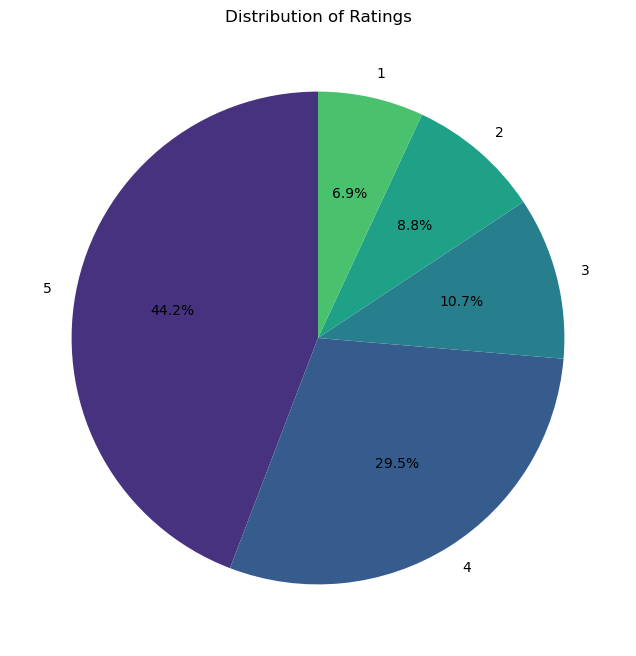

In [ ]:
#Exploring the distribution of ratings:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of ratings using a pie chart
rating_counts = reviews['Rating'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Ratings')
plt.show()

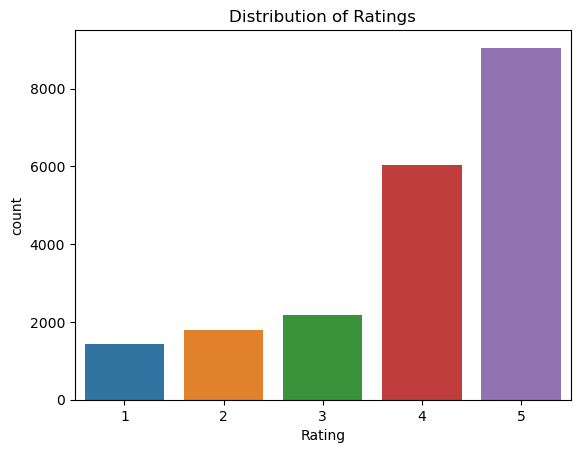

In [ ]:
# Ploting the distribution of ratings
sns.countplot(x='Rating', data=reviews)
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
data=reviews.copy()

In [ ]:
import re
import string

def clean_text(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\(.*?\)', '', text)
    text = re.sub('\{.*?\}', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub('[0-9]', '', text)
    return text
    return text_without_non_round_brackets

cleaned = lambda x: clean_text(x)


In [ ]:
data['Cleaned_review'] = pd.DataFrame(data['Review'].apply(cleaned))
data

,Review,Rating,Cleaned_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not * experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"best kept secret rd time staying charm, not -s..."
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,"ok just looks nice modern outside, desk staff ..."
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


In [ ]:
def classify_review(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating in [1, 2, 3]:
        return "Negative"
    else:
        return "Invalid Rating"

# Apply the classification function to the 'Rating' column
data['Sentiment'] = data['Rating'].apply(lambda x: classify_review(x))
data

,Review,Rating,Cleaned_review,Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not * experience hotel monaco seatt...,Negative
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...",Positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"best kept secret rd time staying charm, not -s...",Positive
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,"ok just looks nice modern outside, desk staff ...",Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,Negative


In [ ]:
#Sentiment Analysis:
from textblob import TextBlob

# Perform sentiment analysis
data['check'] = data['Cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiments into positive, negative, or neutral
data['Sentiment_Label'] = data['check'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
data

,Review,Rating,Cleaned_review,Sentiment,check,Sentiment_Label
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,Positive,0.208744,Positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,Negative,0.227204,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not * experience hotel monaco seatt...,Negative,0.294420,Positive
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...",Positive,0.504825,Positive
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...",Positive,0.384615,Positive
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"best kept secret rd time staying charm, not -s...",Positive,0.232287,Positive
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,Positive,0.503704,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,"ok just looks nice modern outside, desk staff ...",Negative,0.171220,Positive
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,Negative,0.122573,Positive


In [ ]:
# Remove rows where sentiment is 'neutral' in-place
data = data[data['Sentiment_Label'] != 'neutral']
data

,Review,Rating,Cleaned_review,Sentiment,check,Sentiment_Label
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,Positive,0.208744,Positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,Negative,0.227204,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not * experience hotel monaco seatt...,Negative,0.294420,Positive
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...",Positive,0.504825,Positive
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...",Positive,0.384615,Positive
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"best kept secret rd time staying charm, not -s...",Positive,0.232287,Positive
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,Positive,0.503704,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,"ok just looks nice modern outside, desk staff ...",Negative,0.171220,Positive
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,Negative,0.122573,Positive


In [ ]:
#Text Vectorization (TF-IDF):
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Transform the cleaned reviews into TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(data['Cleaned_review']).toarray()

# Create a DataFrame with TF-IDF features
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
df = pd.concat([data, tfidf_df], axis=1)


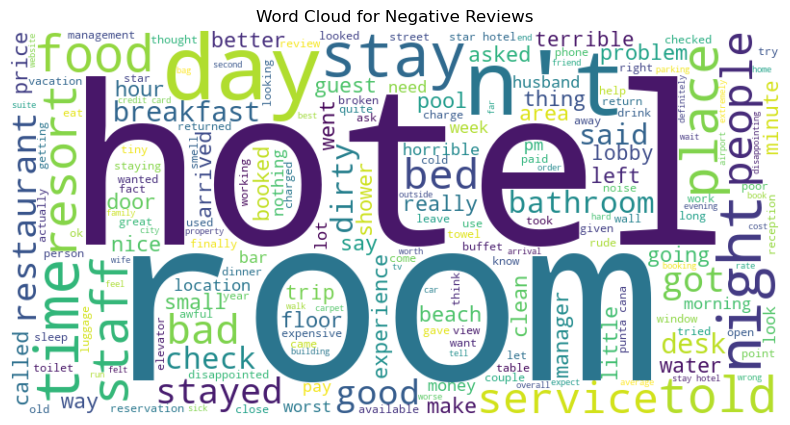

In [ ]:
#Word Clouds:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a Word Cloud for positive reviews
positive_reviews = ' '.join(data[data['Sentiment_Label'] == 'Negative']['Cleaned_review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the Word Cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


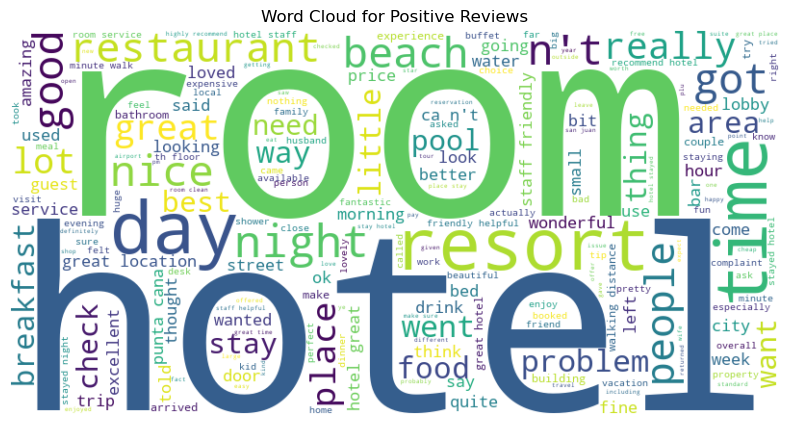

In [ ]:
#Word Clouds:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a Word Cloud for positive reviews
positive_reviews = ' '.join(data[data['Sentiment_Label'] == 'Positive']['Cleaned_review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the Word Cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity


# Preprocess the reviews
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)
data['Processed_Review'] = data['Review'].apply(preprocess_text)

# Use TF-IDF to vectorize the reviews
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['Processed_Review'])

# Function to get the most similar review based on user input
def get_most_similar_review(user_input):
    user_input = preprocess_text(user_input)
    user_vector = vectorizer.transform([user_input])

    similarity = cosine_similarity(user_vector, tfidf_matrix)
    most_similar_index = similarity.argmax()

    return data['Review'].iloc[most_similar_index]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

# Assuming 'Cleaned_review' is the column containing the reviews and 'Sentiment' is the target column
A = data['Cleaned_review']
B = data['Sentiment_Label']

# Split the data into training and testing sets
A_train, A_test, b_train, b_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and SVM
clf_svm = make_pipeline(TfidfVectorizer(), svm.SVC(random_state=42))

# Train the model
clf_svm.fit(A_train, b_train)

# Predictions on the test set
b_pred = clf_svm.predict(A_test)

# Evaluate the model
accuracy = accuracy_score(b_test, b_pred)
classification_rep = classification_report(b_test, b_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.30      0.45       256
     Neutral       0.00      0.00      0.00        11
    Positive       0.95      1.00      0.97      3832

    accuracy                           0.95      4099
   macro avg       0.62      0.43      0.47      4099
weighted avg       0.95      0.95      0.94      4099



C:\Users\tasmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tasmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tasmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation

# Example usage
user_input = "bathroom is not great"
import nltk
from nltk import word_tokenize, pos_tag



A_test = [user_input]
b_pred = clf_svm.predict(A_test)

print('\n \n \n Sentiment:',b_pred)


def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)['compound']

    # Map sentiment score to a percentage
    sentiment_percentage = (sentiment_score + 1) / 2 * 100

    return sentiment_percentage


sentiment_percentage = analyze_sentiment(user_input)
print(f"Sentiment Percentage: {sentiment_percentage:.2f}%")


 
 
 Sentiment: ['Positive']
Sentiment Percentage: 24.52%


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment(user_input):
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Get sentiment polarity scores
    sentiment_scores = sia.polarity_scores(user_input)

    # Determine sentiment based on the compound score
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores

# Example usage
user_input = 'bathroom is not great'
sentiment, scores = get_sentiment(user_input)

# Display the sentiment and scores
print("Sentiment:", sentiment)
print("Sentiment Scores:", scores)


Sentiment: Negative
Sentiment Scores: {'neg': 0.523, 'neu': 0.477, 'pos': 0.0, 'compound': -0.5096}


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
def get_unique_nouns(user_input):
    # Tokenize the user input
    words = word_tokenize(user_input)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)

    # Extract nouns
    nouns = [word for word, pos in tagged_words if pos.startswith('N')]

    # Get unique nouns
    unique_nouns = set(nouns)

    return unique_nouns
unique_nouns = get_unique_nouns(user_input)

print("Unique Nouns:", unique_nouns)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tasmi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Unique Nouns: {'bathroom'}


In [ ]:
'''import nltk
from nltk import word_tokenize, pos_tag
import pandas as pd

def get_unique_nouns(review):
    # Tokenize the review
    words = word_tokenize(review)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)

    # Extract nouns
    nouns = [word for word, pos in tagged_words if pos.startswith('N')]

    # Get unique nouns
    unique_nouns = set(nouns)

    return unique_nouns

# Apply the get_unique_nouns function to each review in the DataFrame
data['Unique_Nouns'] = data['Cleaned_review'].apply(get_unique_nouns)

# Display the DataFrame with unique nouns
data[['Cleaned_review', 'Unique_Nouns']]
'''

"import nltk\nfrom nltk import word_tokenize, pos_tag\nimport pandas as pd\n\ndef get_unique_nouns(review):\n    # Tokenize the review\n    words = word_tokenize(review)\n\n    # Perform part-of-speech tagging\n    tagged_words = pos_tag(words)\n\n    # Extract nouns\n    nouns = [word for word, pos in tagged_words if pos.startswith('N')]\n\n    # Get unique nouns\n    unique_nouns = set(nouns)\n\n    return unique_nouns\n\n# Apply the get_unique_nouns function to each review in the DataFrame\ndata['Unique_Nouns'] = data['Cleaned_review'].apply(get_unique_nouns)\n\n# Display the DataFrame with unique nouns\ndata[['Cleaned_review', 'Unique_Nouns']]\n"

In [ ]:
'''# Create a new DataFrame with unique nouns and their counts
unique_nouns_df = pd.DataFrame(data['Unique_Nouns'].explode().value_counts()).reset_index()
unique_nouns_df.columns = ['Nouns', 'Count']

# Display the new DataFrame with unique nouns and counts
unique_nouns_df

'''

"# Create a new DataFrame with unique nouns and their counts\nunique_nouns_df = pd.DataFrame(data['Unique_Nouns'].explode().value_counts()).reset_index()\nunique_nouns_df.columns = ['Nouns', 'Count']\n\n# Display the new DataFrame with unique nouns and counts\nunique_nouns_df\n\n"

In [ ]:
'''import nltk
from nltk.corpus import words

# Assuming unique_nouns_df is your DataFrame with columns ['Nouns', 'Count']
# Replace this line with your actual DataFrame creation code
# unique_nouns_df = ...

english_words = set(words.words())

# Function to filter out non-English words
def is_english_word(word):
    return word.lower() in english_words

# Apply the function to filter English words
english_nouns_df = unique_nouns_df[unique_nouns_df['Nouns'].apply(is_english_word)].reset_index(drop=True)

# Display the new DataFrame with only English words
english_nouns_df'''


"import nltk\nfrom nltk.corpus import words\n\n# Assuming unique_nouns_df is your DataFrame with columns ['Nouns', 'Count']\n# Replace this line with your actual DataFrame creation code\n# unique_nouns_df = ...\n\nenglish_words = set(words.words())\n\n# Function to filter out non-English words\ndef is_english_word(word):\n    return word.lower() in english_words\n\n# Apply the function to filter English words\nenglish_nouns_df = unique_nouns_df[unique_nouns_df['Nouns'].apply(is_english_word)].reset_index(drop=True)\n\n# Display the new DataFrame with only English words\nenglish_nouns_df"

In [ ]:
# Save to CSV with raw string for the file path
'''Below Code to save the file'''
#english_nouns_df.to_csv(r'C:\Users\tasmi\OneDrive\ExcelR\Hotel Rating Classification Project ExcelR\Hotel_Noun.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv(r'C:\Users\tasmi\OneDrive\ExcelR\Hotel Rating Classification Project ExcelR\Hotel_Noun.csv')
df

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import words

# Download the NLTK words dataset
nltk.download('words')
english_words = set(words.words())

# Function to filter out non-English words
def is_english_word(word):
    return word.lower() in english_words

# Function to get sentiment
def get_sentiment(user_input):
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Get sentiment polarity scores
    sentiment_scores = sia.polarity_scores(user_input)

    # Determine sentiment based on the compound score
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores

# Example user input for sentiment analysis
user_input_sentiment = input("Enter your text for sentiment analysis: ")
# Tokenize the user input
words = word_tokenize(user_input_sentiment)

# Perform part-of-speech tagging
tagged_words = pos_tag(words)

# Extract nouns
nouns = [word for word, pos in tagged_words if pos.startswith('N')]

# Get unique nouns
unique_nouns = set(nouns)

# Use a list comprehension to filter out non-English words
legit_nouns = [noun for noun in unique_nouns if is_english_word(noun)]

print(f"Unique Keywords from Review: {legit_nouns}")

sentiment, scores = get_sentiment(user_input_sentiment)
print(f"Sentiment: {sentiment}")
print(f"Sentiment Scores: {scores}")


In [ ]:
from nltk import word_tokenize, pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet

# Function to filter out non-English words
def filter_english_words(word):
    return word.lower() in wordnet.words()
# Function to get sentiment
def get_sentiment(user_input):
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Get sentiment polarity scores
    sentiment_scores = sia.polarity_scores(user_input)

    # Determine sentiment based on the compound score
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores

# Example user input for sentiment analysis
user_input_sentiment = input("Enter your text for sentiment analysis: ")
# Tokenize the user input
words = word_tokenize(user_input_sentiment)

# Perform part-of-speech tagging
tagged_words = pos_tag(words)

# Extract nouns
nouns = [word for word, pos in tagged_words if pos.startswith('N')]

# Get unique nouns
unique_nouns = set(nouns)

# Use a list comprehension to filter out non-English words
legit_nouns = [noun for noun in unique_nouns if filter_english_words(noun)]

print(f"Unique Keywords from Review: {legit_nouns}")

sentiment, scores = get_sentiment(user_input_sentiment)
print(f"Sentiment: {sentiment}")
print(f"Sentiment Scores: {scores}")


In [ ]:
# Function to print top N nouns by count
def print_top_n_nouns_by_count(df, threshold_count, top_n):

    # Filter DataFrame based on the specified threshold count
    filtered_df = df[df['Count'] <= threshold_count]

    # Sort the filtered DataFrame by the 'Count' column in descending order
    df_sorted = filtered_df.sort_values(by='Count', ascending=False)

    # Select the top 'n' rows
    top_n_nouns = df_sorted.head(top_n)

    # Print the results
    print(f"Top {top_n} KeyWords with Counts above {threshold_count}:")
    for index, row in top_n_nouns.iterrows():
        print(f"KeyWords: {row['Noun']}, Count: {row['Count']}")

# Assuming you already have a DataFrame 'df' with columns 'Noun' and 'Count'
# Replace this line with your actual DataFrame creation code
# df = ...


min_count = df['Count'].min()
max_count = df['Count'].max()
print(f"Minimum Count/Frequency of a Keyword: {min_count}")
print(f"Maximum Count/Frequency of a Keyword: {max_count}")
user_input_threshold = int(input("Enter the minimum count or Frequency for KeyWords: "))
user_input_top_n = int(input("Enter the number for KeyWords you want to display: "))

# Check if the inputs are valid
if user_input_threshold != 0 and user_input_top_n != 0:
    print_top_n_nouns_by_count(df, user_input_threshold, user_input_top_n)


In [ ]:
# Function to get the top N most similar reviews based on user input
def get_top_similar_reviews(user_input, top_n):
    user_vector = vectorizer.transform([user_input])

    similarity = cosine_similarity(user_vector, tfidf_matrix).flatten()

    # Get the indices of the top reviews
    top_indices = similarity.argsort()[-top_n:][::-1]

    # Get the actual reviews based on the indices
    top_reviews = reviews['Review'].iloc[top_indices].tolist()

    return top_reviews

# Example usage
user_input_similarity = input("Enter your text for finding similar reviews: ")
num_reviews_similarity = int(input("Enter the number for Similar reviews you want to see: "))

# Get top similar reviews
top_reviews = get_top_similar_reviews(user_input_similarity, top_n=num_reviews_similarity)

# Print the top reviews
for i, review in enumerate(top_reviews, 1):
    print(f"Top {i} Review: {review}\n\n")



In [ ]:
import pickle
import nltk
from nltk import word_tokenize, pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import words

# Download the NLTK words dataset
nltk.download('words')
english_words = set(words.words())

# Function to filter out non-English words
def is_english_word(word):
    return word.lower() in english_words

# Function to get sentiment
def get_sentiment(user_input):
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Get sentiment polarity scores
    sentiment_scores = sia.polarity_scores(user_input)

    # Determine sentiment based on the compound score
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores

# Example user input for sentiment analysis
user_input_sentiment = input("Enter your text for sentiment analysis: ")
# Tokenize the user input
words = word_tokenize(user_input_sentiment)

# Perform part-of-speech tagging
tagged_words = pos_tag(words)

# Extract nouns
nouns = [word for word, pos in tagged_words if pos.startswith('N')]

# Get unique nouns
unique_nouns = set(nouns)

# Use a list comprehension to filter out non-English words
legit_nouns = [noun for noun in unique_nouns if is_english_word(noun)]

# Create a dictionary to store data
data = {
    'legit_nouns': legit_nouns,
    'sentiment': sentiment,
    'sentiment_scores': scores
}

# Save the data to a pickle file
with open('sentiment_analysis_data.pkl', 'wb') as file:
    pickle.dump(data, file)

print(f"Unique Keywords from Review: {legit_nouns}")
print(f"Sentiment: {sentiment}")
print(f"Sentiment Scores: {scores}")
print("Data saved to sentiment_analysis_data.pkl")


In [ ]:
import pickle

# Function to print top N nouns by count
def print_top_n_nouns_by_count(df, threshold_count, top_n):
    # Filter DataFrame based on the specified threshold count
    filtered_df = df[df['Count'] <= threshold_count]

    # Sort the filtered DataFrame by the 'Count' column in descending order
    df_sorted = filtered_df.sort_values(by='Count', ascending=False)

    # Select the top 'n' rows
    top_n_nouns = df_sorted.head(top_n)

    # Print the results
    print(f"Top {top_n} KeyWords with Counts Near {threshold_count}:")
    for index, row in top_n_nouns.iterrows():
        print(f"KeyWords: {row['Noun']}, Count: {row['Count']}")

# Assuming you already have a DataFrame 'df' with columns 'Noun' and 'Count'
# Replace this line with your actual DataFrame creation code
# df = ...

min_count = df['Count'].min()
max_count = df['Count'].max()
print(f"Minimum Count/Frequency of a Keyword: {min_count}")
print(f"Maximum Count/Frequency of a Keyword: {max_count}")
user_input_threshold = int(input("Enter the minimum count or Frequency for KeyWords: "))
user_input_top_n = int(input("Enter the number for KeyWords you want to display: "))

# Check if the inputs are valid
if user_input_threshold != 0 and user_input_top_n != 0:
    # Create a dictionary to store data
    data = {
        'df': df,
        'user_input_threshold': user_input_threshold,
        'user_input_top_n': user_input_top_n
    }

    # Save the data to a pickle file
    with open('top_n_nouns_data.pkl', 'wb') as file:
        pickle.dump(data, file)

    print_top_n_nouns_by_count(df, user_input_threshold, user_input_top_n)
    print("Data saved to top_n_nouns_data.pkl")


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Function to get the top N most similar reviews based on user input
# Use TF-IDF to vectorize the reviews
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(reviews['Review'])
def get_top_similar_reviews(user_input, top_n):
    user_vector = vectorizer.transform([user_input])

    similarity = cosine_similarity(user_vector, tfidf_matrix).flatten()

    # Get the indices of the top reviews
    top_indices = similarity.argsort()[-top_n:][::-1]

    # Get the actual reviews based on the indices
    top_reviews = reviews['Review'].iloc[top_indices].tolist()

    return top_reviews

# Example usage
user_input_similarity = input("Enter your text for finding similar reviews: ")
num_reviews_similarity = int(input("Enter the number for Similar reviews you want to see: "))

# Get top similar reviews
top_reviews = get_top_similar_reviews(user_input_similarity, top_n=num_reviews_similarity)

# Print the top reviews
for i, review in enumerate(top_reviews, 1):
    print(f"Top {i} Review: {review}\n\n")

# Create a dictionary to store data
data = {
    'user_input_similarity': user_input_similarity,
    'num_reviews_similarity': num_reviews_similarity,
    'top_reviews': top_reviews
}

# Save the data to a pickle file
with open('similar_reviews_data.pkl', 'wb') as file:
    pickle.dump(data, file)

print("Data saved to similar_reviews_data.pkl")
